# Multiple Layer Of Neural Network
## with global gradient descent

In this chapter, I will introduce my own implementation of Multiple Layer of Neural Network with a dumb, simple and quick way.

First, let's prepare the data.

In [20]:
import numpy as np
import copy

X = np.array([
    [0,0,1],
    [0,1,1],
    [1,0,1],
    [1,1,1]
])
y =  np.array([
    [1],
    [0],
    [0],
    [0]
])

The idea is: for the input values, if number of zero is more than number of one, it will return one, else, it will return zero.

Following is a simple method to build the weights matrix. Let's build a two layer network

In [21]:
def designWeights(input_n, output_n):
    return 2 * np.random.random((output_n, input_n + 1)) -1 #attach the bias input

In [22]:
weights = np.array([
    designWeights(3,3),
    designWeights(3,1)
])

In [23]:
m, n = X.shape

We still use sigmoid to simulate the prediction. There will be three methods:

- sigmoid is the sigmoid method
- h_per_layer is the hyperthese method to do the hyperthese for each layer
- h is the overall hyperthese method


In [24]:
def sigmoid(X):
    return 1/(1+np.exp(-X))
def h_per_layer(X,weights, layer_index):
    X_ = np.c_[np.ones((X.shape[0],1)), X]
    return np.array([sigmoid(X_.dot(weights_per_layer)) for weights_per_layer in weights[layer_index]]).T
def h(X,weights):
    layer_n = weights.shape[0]
    for layer_index in range(layer_n):
        X = h_per_layer(X, weights, layer_index)
    return X

In [25]:
def cost(y_, y):
    return np.square(y_ - y).sum()

If you read some book, you must be very familiar with the term *backpropagation*, which is oftenly used to do the gradien descent. The backpropogation version will be put in aonther blog. Here I am going to do with a global gradient descent. The idea is very simple, first I will implement a simple and dumb method of derivation to get the value of partial derivative for each weight and then will move the weight a little to implement the gradient descent

In [26]:
def derivation(X, weights, layer_index, weight_output_index, weight_unit_index, original_value):
    small_diff = 0.001
    weights_new = copy.deepcopy(weights)
    weights_new[layer_index][weight_output_index][weight_unit_index]=weights_new[layer_index][weight_output_index][weight_unit_index] + small_diff
    y_=  h(X, weights_new)
    return (cost(y_, y) -  original_value)/small_diff

In [27]:
def gradient_descent(X, y, weights):
    layer_n =weights.shape[0]
    retWeights = copy.deepcopy(weights)
    original_cost = cost(h(X, retWeights), y)
    learning_rate = 1
    for layer_index in range(layer_n):
        for output_index, weights_unit  in enumerate(retWeights[layer_index]):
            for unit_index, weights_output in enumerate(weights_unit):
                diff = derivation(X,weights, layer_index, output_index, unit_index, original_cost)
                retWeights[layer_index][output_index][unit_index]=retWeights[layer_index][output_index][unit_index] - learning_rate * diff
            
    return retWeights, original_cost

In [28]:
cost_history=[]
for i in range(1000):
    weights, cost_value = gradient_descent(X, y, weights)
    cost_history.append(cost_value)

In [29]:
h(X,weights)

array([[ 0.97162344],
       [ 0.01545361],
       [ 0.01536768],
       [ 0.00185797]])

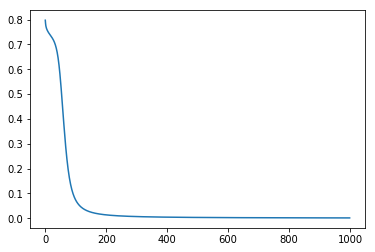

In [30]:
import matplotlib.pyplot as plt
plt.plot(cost_history)
plt.show()

You see, it seems to be working very well. Let's try some more test:

In [31]:
X_test = np.array([
    [0,0,0], #=>1
    [1,1,0] #=> 0
])

In [32]:
h(X_test, weights)

array([[ 0.85315039],
       [ 0.00160638]])

Research is done, let's wrap up the code and build a better version

In [33]:
import numpy as np
import copy
class MultipleLayerNN():
    def __init__(self, training_steps=1000, small_diff_value = 0.001, seed = 1, record_cost_history = False, learning_rate=1, layer_design=[]):
        self.training_steps = training_steps
        self.small_diff_value =  small_diff_value
        self.seed = seed
        self.learning_rate = learning_rate
        self.record_cost_history = record_cost_history
        self.cost_history = []
        self.layer_design = layer_design
                 
    def __designWeights(self, input_n, output_n):
        return 2 * np.random.random((output_n, input_n + 1)) -1 #attach the bias input
    
    def __sigmoid(self, X):
        return 1/(1+np.exp(-X))
    
    def __h_per_layer(self, X,weights, layer_index):
        X_ = np.c_[np.ones((X.shape[0],1)), X]
        return np.array([self.__sigmoid(X_.dot(weights_per_layer)) for weights_per_layer in weights[layer_index]]).T
    
    def __h(self, X,weights):
        layer_n = weights.shape[0]
        for layer_index in range(layer_n):
            X = self.__h_per_layer(X, weights, layer_index)
        return X
    
    def __cost(self, y_, y):
        return np.square(y_ - y).sum()
    
    def __derivation(self, X, weights, layer_index, weight_output_index, weight_unit_index, original_value,y):
        small_diff = self.small_diff_value
        weights_new = copy.deepcopy(weights)
        weights_new[layer_index][weight_output_index][weight_unit_index]=weights_new[layer_index][weight_output_index][weight_unit_index] + small_diff
        y_=  self.__h(X, weights_new)
        return (self.__cost(y_, y) -  original_value)/small_diff
    
    def __gradient_descent(self, X, y, weights):
        layer_n =self.weights_.shape[0]
        retWeights = copy.deepcopy(self.weights_)
        original_cost = self.__cost(self.__h(X, retWeights), y)
        learning_rate = self.learning_rate
        for layer_index in range(layer_n):
            for output_index, weights_unit  in enumerate(retWeights[layer_index]):
                for unit_index, weights_output in enumerate(weights_unit):
                    diff = self.__derivation(X,weights, layer_index, output_index, unit_index, original_cost,y)
                    retWeights[layer_index][output_index][unit_index]=retWeights[layer_index][output_index][unit_index] - learning_rate * diff

        return retWeights, original_cost
    
    def fit(self, X, y):
        np.random.seed(self.seed)
        self.weights_ = np.array([self.__designWeights(*layer) for layer in self.layer_design])
        for i in range(1000):
            self.weights_, cost_value = self.__gradient_descent(X, y, self.weights_)
            if self.record_cost_history:
                self.cost_history.append(cost_value)
    def predict(self, X):
        return self.__h(X, self.weights_)

This will be a new values to train. The logic will be:

> from left to right, will do a XOR operation (a, b, c, d) => a ^ b ^ c ^ d


In [36]:
clf = MultipleLayerNN(record_cost_history=True, layer_design=[(3,3),(3,1)])
clf.fit(X,y)

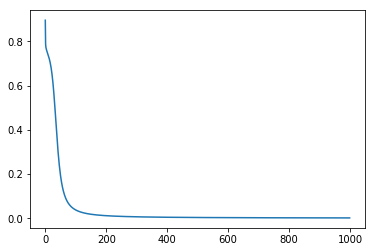

In [37]:
import matplotlib.pyplot as plt
plt.plot(clf.cost_history)
plt.show()

It is working!